# Sports Module--Linear Regression

### Professor X

In this notebook, we will investigate how to create linear regression models and apply them accuarately to sports.

Estimated time: 1hr

## Topics Covered

1.) How to create a linear regression model using Least-Squares Regession

2.) How to handle and identify outliers and influential observations

3.) What is extrapolation? And how to prevent it

### Dependencies

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from re import sub

### Overview of the Data and the Investigation

In this notebook, we will use nba salary and performance data to determine if salary and point scored per game (PPG) are linearly correlated. The data set contains performance and salary data for NBA players from the 2015-2016 NBA season.

In [6]:
##Run the cell below to load the Data
data=pd.read_csv("nbasalariespoints.csv")

In [88]:
#Run the following cell to view the top 25 entries from the table
data.head(25)
data=data.rename(columns={'PS/G▼': "PPG"})
data

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,AST,STL,BLK,TOV,PF,PPG,Unnamed: 0.1,RK,TEAM,SALARY
0,0,1.0,Stephen Curry,PG,27.0,GSW,79.0,79.0,34.2,10.2,...,6.7,2.1,0.2,3.3,2.0,30.1,53.0,54.0,Golden State Warriors,"$11,370,786"
1,1,2.0,James Harden,SG,26.0,HOU,82.0,82.0,38.1,8.7,...,7.5,1.7,0.6,4.6,2.8,29.0,23.0,24.0,Houston Rockets,"$15,756,438"
2,2,3.0,Kevin Durant,SF,27.0,OKC,72.0,72.0,35.8,9.7,...,5.0,1.0,1.2,3.5,1.9,28.2,6.0,7.0,Oklahoma City Thunder,"$20,158,622"
3,3,4.0,DeMarcus Cousins,C,25.0,SAC,65.0,65.0,34.6,9.2,...,3.3,1.6,1.4,3.8,3.6,26.9,22.0,23.0,Sacramento Kings,"$15,851,950"
4,4,5.0,LeBron James,SF,31.0,CLE,76.0,76.0,35.6,9.7,...,6.8,1.4,0.6,3.3,1.9,25.3,1.0,2.0,Cleveland Cavaliers,"$22,970,500"
5,5,6.0,Damian Lillard,PG,25.0,POR,75.0,75.0,35.7,8.2,...,6.8,0.9,0.4,3.2,2.2,25.1,154.0,155.0,Portland Trail Blazers,"$4,236,287"
6,6,7.0,Anthony Davis,PF,22.0,NOP,61.0,61.0,35.5,9.2,...,1.9,1.3,2.0,2.0,2.4,24.3,94.0,95.0,New Orleans Pelicans,"$7,070,730"
7,7,8.0,DeMar DeRozan,SG,26.0,TOR,78.0,78.0,35.9,7.9,...,4.0,1.0,0.3,2.2,2.1,23.5,65.0,66.0,Toronto Raptors,"$10,050,000"
8,8,9.0,Russell Westbrook,PG,27.0,OKC,80.0,80.0,34.4,8.2,...,10.4,2.0,0.3,4.3,2.5,23.5,15.0,16.0,Oklahoma City Thunder,"$16,744,218"
9,9,10.0,Paul George,SF,25.0,IND,81.0,81.0,34.8,7.5,...,4.1,1.9,0.4,3.3,2.8,23.1,14.0,15.0,Indiana Pacers,"$17,120,106"


### Question 1: Filter the data
To make the data easier to manipulate, sort the data by ppg and take the top 100 rows

In [73]:
#correct code below, needs to be removed for actual Homework
filtered_data=data.sort_values(by=["PPG"], ascending=False).head(100)

#since we only care aboout PPG, player name and salary, Remove all other rows
filtered_data=filtered_data[["Player", "PPG", "SALARY"]]

#Drop all players where salary data is missing
filtered_data=filtered_data.dropna()
filtered_data=filtered_data.reset_index()
filtered_data=filtered_data[["Player", "PPG", "SALARY"]]

#Convert salary string to float
value=[]
for x in range(0,len(filtered_data["SALARY"])):
    salary=filtered_data["SALARY"][x]
    value = value + [(sub(r'[^\d.]', '', salary))]
filtered_data["SALARY"]= value
filtered_data

,Player,PPG,SALARY
0,Stephen Curry,30.1,11370786
1,James Harden,29.0,15756438
2,Kevin Durant,28.2,20158622
3,DeMarcus Cousins,26.9,15851950
4,LeBron James,25.3,22970500
5,Damian Lillard,25.1,4236287
6,Anthony Davis,24.3,7070730
7,DeMar DeRozan,23.5,10050000
8,Russell Westbrook,23.5,16744218
9,Paul George,23.1,17120106


### Question 2: Create a scatterplot

In order to see if there is a linear relationship between PPG and Salary, we must first create a scatterplot of the data

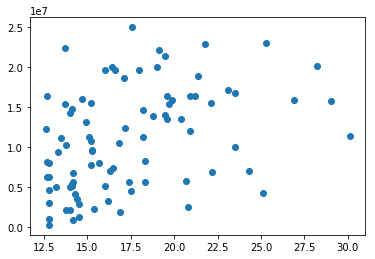

In [81]:
#Create a scatterplot of the data showing Salary dependent on PPG
plt.scatter(filtered_data["PPG"], filtered_data["SALARY"])
plt.show()

In [ ]:
# Does there appear to be a linear correlation between PPG and salary? Justify your answer?
q2_response="replace this"

### Question 3: Least-Squares Regression
A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).

LEAST SQUARES REGRESSION is the most common type of linear regression and calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0). 

How to calculate the Least-Squares Regression Line:

1.) Calculate: mean of X, mean of Y, SD of X, SD of Y, and r

2.) Solve for r, the correlation coefficient

3.)The least squares regression line is represented by the equation   

                        PREDICTED Y = a + b X
4.) For least squares regression: 
           
           b = r(SD of Y/SD of X)
           a = mean of Y - (b * mean of X)


#### 3A: Use the the equations above to create the linear regression formula for Salary as it depends on PPG 
(hint: use google to find the equation for r)




In [ ]:
r = ...
a = ...
b = ...

#### 3B: Plot the linear regression on the scatter plot from question 2

In [85]:
plot=...

### Question 4: Residuals

The residuals (deviations from the fitted line to the observed) are essential in identifying lurking variables. A lurking variable exists when the relationship between two variables is significantly affected by the presence of a third variable which has not been included in the modeling effort.If the residuals do not appear randomly distributed this is a sign of a lurking variable and means the fit may not be appropriate.

#### 4a: Calculate the residuals and store them in DataFrame

In [86]:
residuals=...

#### 4b: Plot the residuals

In [ ]:
residual_plot=...

#### 4c: Describe the shape of the residual distribution (is it random, or does there appear to be a pattern etc.)

In [87]:
q_4c="replace this"

#### 4d: What are possible lurking variables in this data?

In [89]:
q_4d= "replace this"

### Question 5: Outliers and Influential Observations

A point that lies far away from the fitted line, thus has a high residual value in known as an outlier. While a point that lies far away in the horizontal direction is known as an influential observation. Both of these points can have a significant effect on the slope of the regression line and the correlation coefficient.

#### 5a: Identify possible outliers and save them in DF

In [ ]:
outliers=...

####  5b: Identify possible influential observations and save them in a DF

In [ ]:
influential=...

#### 5c: Re-plot the data without the outliers and re-calculate the linear regression line

In [94]:
#create plot below
plot_no_outliers=...


#calculate new values
a=...
b...
r=..


SyntaxError: invalid syntax (<ipython-input-94-ef829091f96c>, line 7)

#### 5d: Re-plot the data without the influential points and re-calculate the linear regression line

In [ ]:
#create plot below
plot_no_influential=...


#calculate new values
a=...
b...
r=..

#### 5d: Analysis--What did removing these points do? How did it affect the slope and r? 

In [95]:
q_5d="replace this"

### Question 6: Extrapolation
Attempting to use a regression equation to predict values outside of this range is often inappropriate, and may yield impossible or extreme answers.

Determine whether or not it is possible to predict values for the following scenarios: (if yes: calculate the value. If no: explain why)

In [90]:
#Salary for someone who scores 35 PPG
q_6a="replace this"

In [ ]:
#Salary for someone who scroes 85 PPG
q_6b="replace this"

In [93]:
#Salary for someone who scroes 0 PPG
q_6c="replace this"

In [91]:
#Salary for someone who scroes 50 PPG
q_6d="replace this"

## Congratulations! You have finished this notebook. 
### Please save and submit your notebook by running the following cells

In [92]:
##Submission 

### References
http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

http://onlinestatbook.com/2/regression/intro.html
